In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import math


UsageError: Line magic function `%` not found.


In [2]:
titanic=pd.read_csv(r"C:\Users\Ankur Srivastava\Documents\Python\titanic\train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


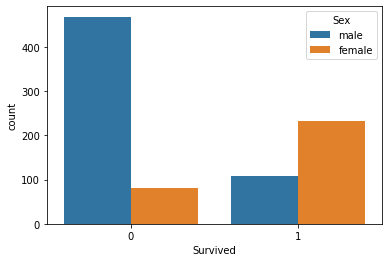

In [3]:
sns.countplot(x='Survived', hue='Sex', data=titanic)

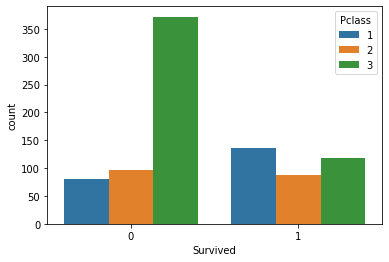

In [4]:
sns.countplot(x='Survived', hue='Pclass', data=titanic)

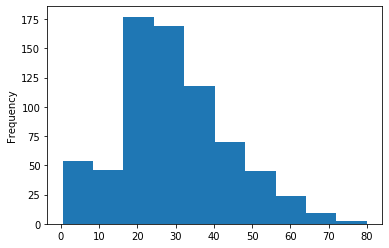

In [5]:
titanic['Age'].plot.hist()

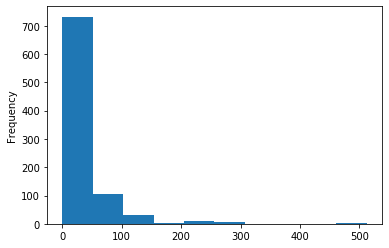

In [6]:
titanic['Fare'].plot.hist()

In [7]:
titanic.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

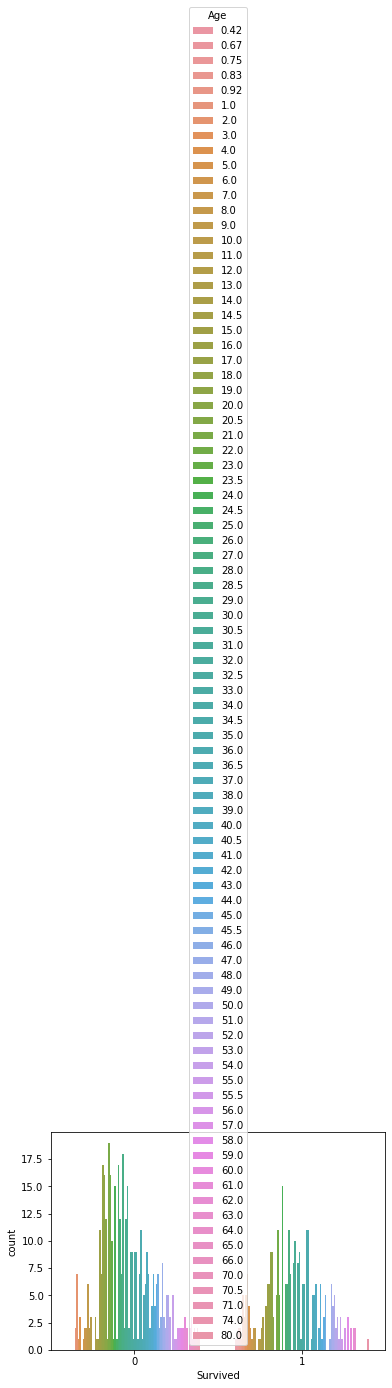

In [8]:
sns.countplot(x='Survived', hue='Age', data=titanic)

In [9]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
titanic.drop('Cabin', axis=1, inplace=True)

In [12]:
titanic.dropna(inplace=True)

In [13]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
pd.get_dummies(titanic['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [16]:
Sex=pd.get_dummies(titanic['Sex'],drop_first=True)

In [17]:
Embarked=pd.get_dummies(titanic['Embarked'],drop_first=True)

In [18]:
Pclass=pd.get_dummies(titanic['Pclass'],drop_first=True)

In [19]:
titanic=pd.concat([titanic,Sex,Embarked,Pclass],axis=1)

In [20]:
titanic.drop(['Pclass','Sex','Embarked','Name','Ticket','Fare'],axis=1,inplace=True)

In [21]:
titanic.head()

,PassengerId,Survived,Age,SibSp,Parch,male,Q,S,2,3
0,1,0,22.0,1,0,1,0,1,0,1
1,2,1,38.0,1,0,0,0,0,0,0
2,3,1,26.0,0,0,0,0,1,0,1
3,4,1,35.0,1,0,0,0,1,0,0
4,5,0,35.0,0,0,1,0,1,0,1


In [49]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Age          712 non-null    float64
 3   SibSp        712 non-null    int64  
 4   Parch        712 non-null    int64  
 5   male         712 non-null    uint8  
 6   Q            712 non-null    uint8  
 7   S            712 non-null    uint8  
 8   2            712 non-null    uint8  
 9   3            712 non-null    uint8  
dtypes: float64(1), int64(4), uint8(5)
memory usage: 36.9 KB


In [22]:
y=titanic['Survived']
X=titanic.drop('Survived',axis=1)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [24]:
from  sklearn.linear_model import LogisticRegression

In [25]:
Logmodel=LogisticRegression()

In [26]:
Logmodel.fit(X_train,y_train)

C:\Users\Ankur Srivastava\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
predictions=Logmodel.predict(X_test)

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       126
           1       0.75      0.73      0.74        88

    accuracy                           0.79       214
   macro avg       0.78      0.78      0.78       214
weighted avg       0.79      0.79      0.79       214



In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
print(confusion_matrix(y_test,predictions))

[[105  21]
 [ 24  64]]


In [32]:
from sklearn.metrics import accuracy_score

In [33]:
print(accuracy_score(y_test,predictions))

0.7897196261682243
